<a href="https://colab.research.google.com/github/sarker2018/time-series-framework-review/blob/main/time_series_framework_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Endogenous vs Exogenous

- Endogenous: Input variables that are influenced by other variables in the system and
on which the output variable depends.

- Exogenous : Input variables that are not influenced by other variables in the system and
on which the output variable depends.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n = 3

# X,y = split_sequence(x,n)
input, label = split_sequence(x,n)
df = pd.DataFrame(list(zip(input, label)),
               columns =['input', 'label'])
print('The sequenced data looks like:\n')
df


The sequenced data looks like:



,input,label
0,"[1, 2, 3]",4
1,"[2, 3, 4]",5
2,"[3, 4, 5]",6
3,"[4, 5, 6]",7
4,"[5, 6, 7]",8
5,"[6, 7, 8]",9
6,"[7, 8, 9]",10


In [ ]:
re = input.reshape(input.shape[0],input.shape[1],1)

In [ ]:
# example of defining a dataset
from numpy import array
# define the dataset
data = list()
n = 5000
for i in range(n):
    data.append([i+1, (i+1)*10])
data = array(data)
print(data[:5, :])
print(data.shape)

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]
 [ 5 50]]
(5000, 2)


In [ ]:
# example of dropping the time dimension from the dataset
from numpy import array
# define the dataset
data = list()
n = 5000
for i in range(n):
    data.append([i+1, (i+1)*10])
data = array(data)
# drop time
data = data[:, 1]
print(data.shape)
print("\n\n",data[0:5])

(5000,)


 [10 20 30 40 50]


In [ ]:
# example of splitting a univariate sequence into subsequences
from numpy import array
# define the dataset
data = list()
n = 5000
for i in range(n):
    data.append([i+1, (i+1)*10])
data = array(data)
# drop time
data = data[:, 1]
# split into samples (e.g. 5000/200 = 25)
samples = list()
length = 200
# step over the 5,000 in jumps of 200
for i in range(0,n,length):
# grab from i to i + 200
    sample = data[i:i+length]
    samples.append(sample)
print(len(samples))
print(data.shape)
samples[0:3]

In [ ]:
# convert list of arrays into 2d array
data = array(samples)
print(data.shape)

(25, 200)


In [ ]:
# reshape into [samples, timesteps, features]
data = data.reshape((len(samples), length,1))
print(data.shape)


(25, 200, 1)


# Univariate MLP

In [ ]:
# univariate data preparation
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
# gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [ ]:
import keras
from keras import Sequential
from keras.layers import Activation, Dense 

In [ ]:
# define model
model = keras.Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
hist = model.fit(X, y, epochs=2000, verbose=1)

dict_keys(['loss'])


Text(0, 0.5, 'loss')

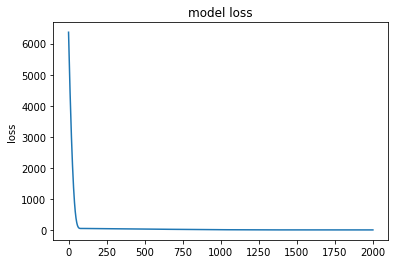

In [ ]:
print(hist.history.keys())
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])

plt.title('model loss')
plt.ylabel('loss')

In [ ]:
# demonstrate prediction
x_input = array([[70, 80, 90],[70, 80, 90],[70, 80, 90],[70, 80, 90]])
x_input = x_input.reshape((-1, n_steps))
yhat = model.predict(x_input, verbose=0)
yhat

array([[100.43176],
       [100.43176],
       [100.43176],
       [100.43176]], dtype=float32)

# Multivariate MLP

In [ ]:
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
import numpy as np
dataset = np.hstack((in_seq1, in_seq2, out_seq))
dataset[:5,]



array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105]])

## Multivariate multi-step input

In [ ]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
# Sequence and Outputs
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
import numpy as np
dataset = np.hstack((in_seq1, in_seq2, out_seq))
dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [ ]:
# Reshaping for the model
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))
X

array([[10, 15, 20, 25, 30, 35],
       [20, 25, 30, 35, 40, 45],
       [30, 35, 40, 45, 50, 55],
       [40, 45, 50, 55, 60, 65],
       [50, 55, 60, 65, 70, 75],
       [60, 65, 70, 75, 80, 85],
       [70, 75, 80, 85, 90, 95]])

In [ ]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=2000, verbose=0)

In [ ]:

# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_input))


In [ ]:

yhat = model.predict(x_input, verbose=0)
print('input array: \t', x_input, '\nprediction: \t',yhat)

input array: 	 [[ 80  85  90  95 100 105]] 
prediction: 	 [[207.1394]]


## Multi-headed MLP

In [ ]:
from keras.models import Input, Model

import numpy
# first input model
visible1 = Input(shape=(n_steps,))
dense1 = Dense(100, activation='relu')(visible1)

# second input model
visible2 = Input(shape=(n_steps,))
dense2 = Dense(100, activation='relu')(visible2)

# merge input models
from keras.layers import concatenate

merge = concatenate([dense1, dense2],axis=1)
output = Dense(1)(merge)
model = Model(inputs = [visible1,visible2], outputs = output)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 100)          400         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          400         input_2[0][0]                    
______________________________________________________________________________________________

# Plot model hierrarchy

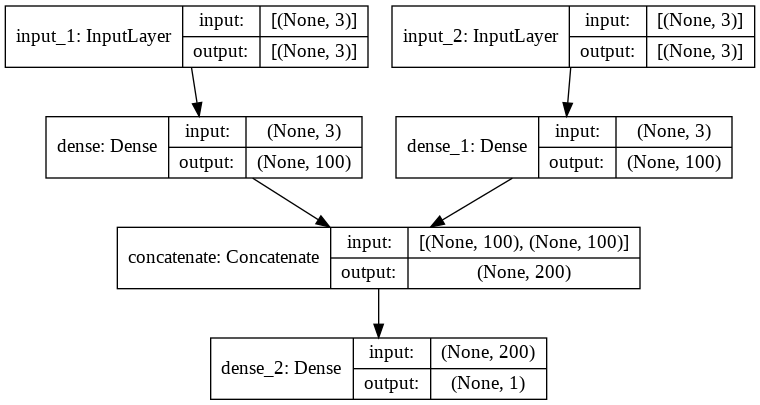

In [ ]:
# Plot model hierrarchy
from keras.utils import vis_utils
vis_utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
# Reshaping for the model
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# flatten input
n_input = X.shape[1] * X.shape[2]

In [ ]:
print(X)
X[:,:,1]

[[[10 15]
  [20 25]
  [30 35]]

 [[20 25]
  [30 35]
  [40 45]]

 [[30 35]
  [40 45]
  [50 55]]

 [[40 45]
  [50 55]
  [60 65]]

 [[50 55]
  [60 65]
  [70 75]]

 [[60 65]
  [70 75]
  [80 85]]

 [[70 75]
  [80 85]
  [90 95]]]


array([[15, 25, 35],
       [25, 35, 45],
       [35, 45, 55],
       [45, 55, 65],
       [55, 65, 75],
       [65, 75, 85],
       [75, 85, 95]])

In [ ]:
# separate input data
X1 = X[:, :, 0]
X2 = X[:, :, 1]

In [ ]:
# fit model
model.fit([X1, X2], y, epochs=1500, verbose=1)

Epoch 1/1500
1/1 [==============================] - 14s 14s/step - loss: 17193.7070
Epoch 2/1500
1/1 [==============================] - 0s 6ms/step - loss: 16568.0312
Epoch 3/1500
1/1 [==============================] - 0s 6ms/step - loss: 15956.6240
Epoch 4/1500
1/1 [==============================] - 0s 6ms/step - loss: 15357.1748
Epoch 5/1500
1/1 [==============================] - 0s 5ms/step - loss: 14768.7344
Epoch 6/1500
1/1 [==============================] - 0s 4ms/step - loss: 14193.5908
Epoch 7/1500
1/1 [==============================] - 0s 4ms/step - loss: 13630.4668
Epoch 8/1500
1/1 [==============================] - 0s 5ms/step - loss: 13079.8018
Epoch 9/1500
1/1 [==============================] - 0s 21ms/step - loss: 12544.2295
Epoch 10/1500
1/1 [==============================] - 0s 11ms/step - loss: 12025.3779
Epoch 11/1500
1/1 [==============================] - 0s 5ms/step - loss: 11522.2520
Epoch 12/1500
1/1 [==============================] - 0s 7ms/step - loss: 11032.060

In [ ]:
# reshape one sample for making a forecast
x_input = array([[80, 85], [90, 95], [100, 105]])
x1 = x_input[:, 0].reshape((1, n_steps))
x2 = x_input[:, 1].reshape((1, n_steps))

In [ ]:
# demonstrate prediction
yhat = model.predict([x1, x2], verbose=0)
print(yhat)

[[206.94543]]


## Multi-output MLP model

In [ ]:
# Data create and reshaping for multi-output MLP Model
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, : ], sequences[end_ix,]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
# Sequence and Outputs
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
import numpy as np
dataset = np.hstack((in_seq1, in_seq2, out_seq))
print(dataset)

# Reshaping for the model
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# flatten input
n_input = X.shape[1] * X.shape[2]




[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


# Modeule and dependencies

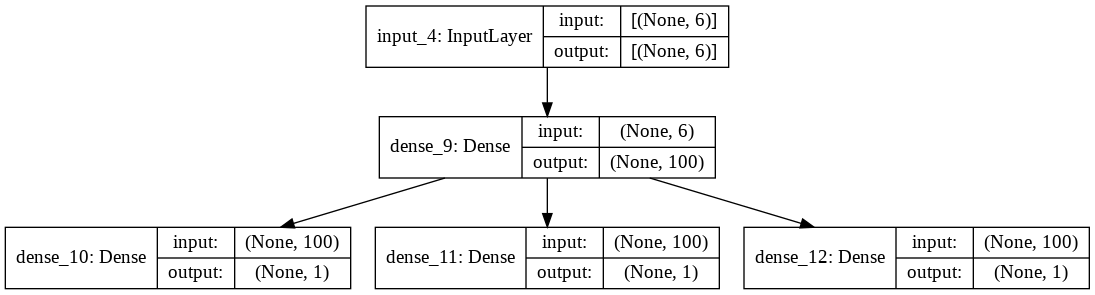

In [ ]:
# model define

from keras.models import Sequential
from keras.layers import Dense
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input

from keras.layers.merge import concatenate

# define model
visible = Input(shape=(n_input,))
dense = Dense(100, activation='relu')(visible)

# define output 1
output1 = Dense(1)(dense)
# define output 2
output2 = Dense(1)(dense)
# define output 2
output3 = Dense(1)(dense)


# tie together
model = Model(inputs=visible, outputs=[output1, output2, output3])
model.compile(optimizer='adam', loss='mse')

# Plot model hierrarchy
from keras.utils import vis_utils
vis_utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
# separate output
y1 = y[:, 0].reshape((y.shape[0], 1))
y2 = y[:, 1].reshape((y.shape[0], 1))
y3 = y[:, 2].reshape((y.shape[0], 1))

In [ ]:
# fit model
model.fit(X, [y1,y2,y3], epochs=2000, verbose=1)

Epoch 1/2000


ValueError: ignored

## Multi-step Forecast

In [ ]:
# multi-step data preparation
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] [40 50]
[20 30 40] [50 60]
[30 40 50] [60 70]
[40 50 60] [70 80]
[50 60 70] [80 90]


In [ ]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps_in))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               400       
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 202       
Total params: 602
Trainable params: 602
Non-trainable params: 0
_________________________________________________________________


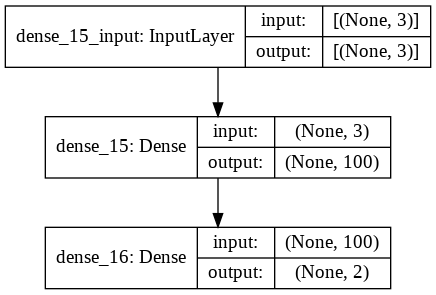

In [ ]:
# Plot model hierrarchy
from keras.utils import vis_utils
vis_utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
# Model fit
model.fit(X, y, epochs=2000, verbose=1)


Epoch 1/2000
1/1 [==============================] - 10s 10s/step - loss: 3983.7358
Epoch 2/2000
1/1 [==============================] - 0s 6ms/step - loss: 3884.7571
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 3787.3384
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 3691.2671
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 3597.2212
Epoch 6/2000
1/1 [==============================] - 0s 5ms/step - loss: 3505.0957
Epoch 7/2000
1/1 [==============================] - 0s 6ms/step - loss: 3414.4019
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 3325.0625
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 3237.0945
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 3150.6313
Epoch 11/2000
1/1 [==============================] - 0s 13ms/step - loss: 3065.5378
Epoch 12/2000
1/1 [==============================] - 0s 12ms/step - loss: 2982.0754
Epoch 13/2

In [ ]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((-1, n_steps_in))
yhat = model.predict(x_input, verbose=1)
print(yhat)

1/1 [==============================] - 0s 14ms/step
[[100.734505 111.957634]]


# Develop CNNs for Time Series Forecasting
1. Univariate CNN Models
2. Multivariate CNN Models
3. Multi-step CNN Models
4. Multivariate Multi-step CNN Models



## Univariate CNN

In [ ]:
# univariate data preparation
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])



    
 # univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps,
n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Plot model hierrarchy
from keras.utils import vis_utils
vis_utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

model.fit(X, y, epochs=1000, verbose=1)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


## Multivariate  CNN
There are two main models that we may require with multivariate time series data;
they are:
1. Multiple Input Series.
2. Multiple Parallel Series.

### Multiple Input Series

In [ ]:
def split_sequence(sequence, n_steps):
    X,y = list(), list()
    for i in range(len(sequence)):
        end_ix = i+n_steps
        if end_ix > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:
# multivariate data preparation
from numpy import array
from numpy import hstack

in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

n_steps = 3
# convert into input/output
X, y = split_sequence(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


In [ ]:
# define input sequence
n_features = X.shape[2]
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps,
n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

### Multi-headed CNN Model

In [ ]:
# multivariate multi-headed 1d cnn example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# one time series per head
n_features = 1
# separate input data
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)
# first input model
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible1)
cnn1 = MaxPooling1D(pool_size=2)(cnn1)
cnn1 = Flatten()(cnn1)

# second input model
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible2)
cnn2 = MaxPooling1D(pool_size=2)(cnn2)

cnn2 = Flatten()(cnn2)
# merge input models
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)
model = Model(inputs=[visible1, visible2], outputs=output)
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit([X1, X2], y, epochs=1000, verbose=0)
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x1 = x_input[:, 0].reshape((1, n_steps, n_features))
x2 = x_input[:, 1].reshape((1, n_steps, n_features))
yhat = model.predict([x1, x2], verbose=0)
print(yhat)


[[208.77905]]


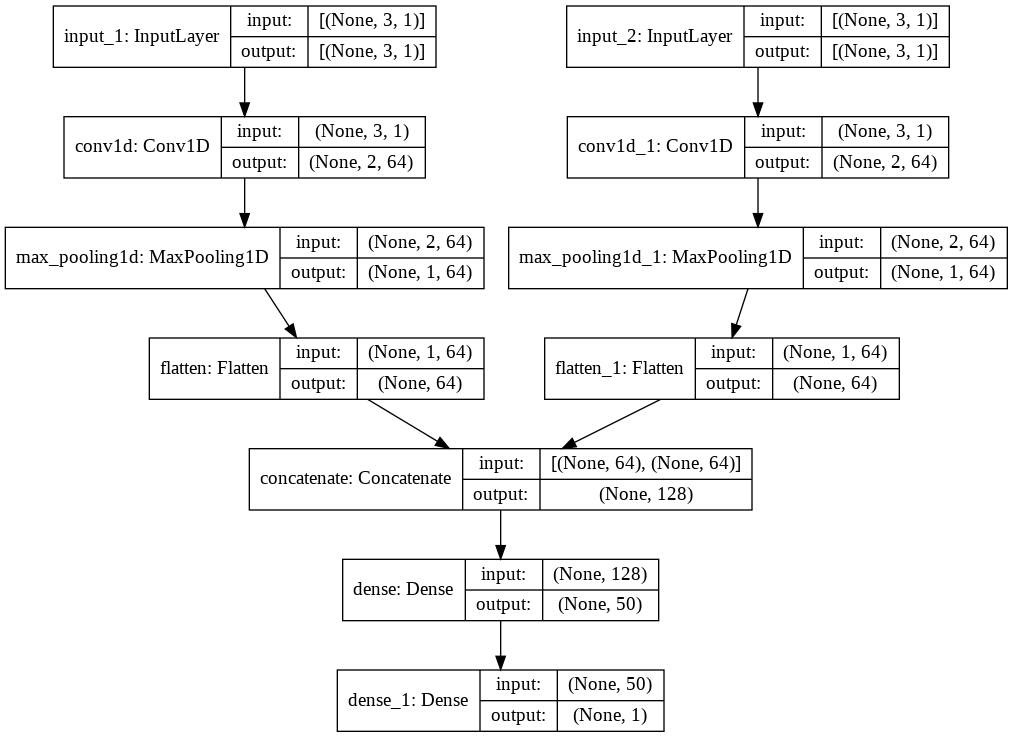

In [ ]:
# Plot model hierrarchy
from keras.utils import vis_utils
vis_utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

### Multiple parallel series

(6, 3, 3) (6, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [40 45 85]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]
[[ 99.99913 104.99892 204.99805]]


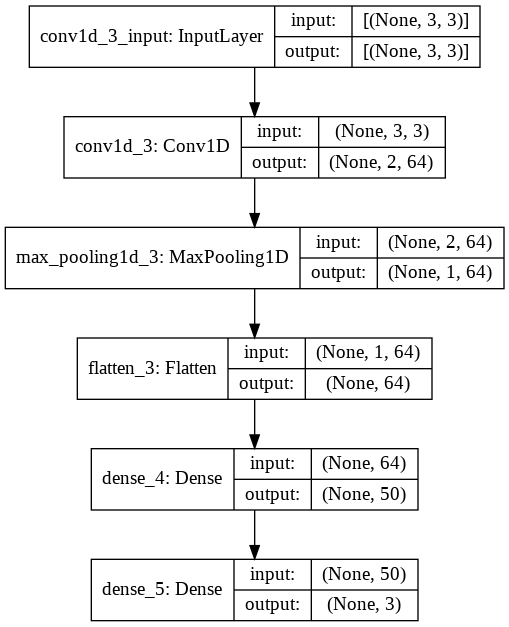

In [ ]:
# multivariate output 1d cnn example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)

        y.append(seq_y)
    return array(X), array(y)
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2

print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])
n_features = X.shape[2]
# define model
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps,
n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=5000, verbose=0)
# demonstrate prediction
x_input = array([[70,75,145], [80,85,165], [90,95,185]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

# Plot model hierrarchy
from keras.utils import vis_utils
vis_utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

### Multi-output CNN Model

In [ ]:
# multivariate output 1d cnn example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# separate output
y1 = y[:, 0].reshape((y.shape[0], 1))
y2 = y[:, 1].reshape((y.shape[0], 1))
y3 = y[:, 2].reshape((y.shape[0], 1))
# define model
visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(filters=64, kernel_size=2, activation='relu')(visible)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)
# define output 1
output1 = Dense(1)(cnn)
# define output 2
output2 = Dense(1)(cnn)
# define output 3
output3 = Dense(1)(cnn)
# tie together
model = Model(inputs=visible, outputs=[output1, output2, output3])
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, [y1,y2,y3], epochs=2000, verbose=0)
# demonstrate prediction
x_input = array([[70,75,145], [80,85,165], [90,95,185]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[array([[100.769226]], dtype=float32), array([[106.56757]], dtype=float32), array([[207.2057]], dtype=float32)]


(6, 3, 3) (6, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [40 45 85]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]
[[100.3547  105.45887 205.78976]]


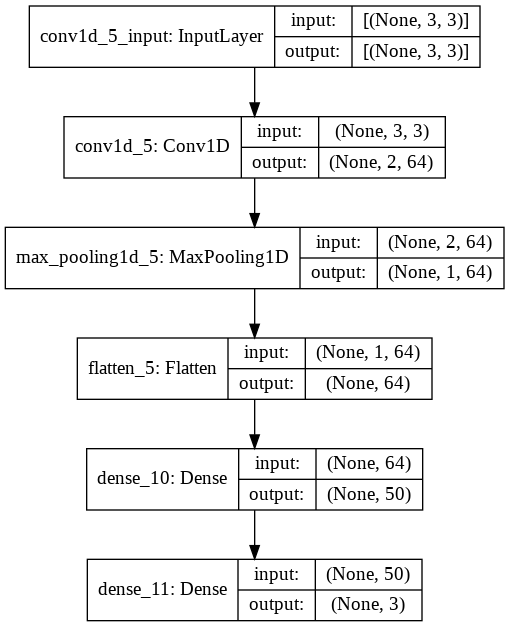

In [ ]:
# multivariate output 1d cnn example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)

        y.append(seq_y)
    return array(X), array(y)
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2

print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])
n_features = X.shape[2]
# define model
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps,
n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=5000, verbose=0)
# demonstrate prediction
x_input = array([[70,75,145], [80,85,165], [90,95,185]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)



In [ ]:
# Plot model hierrarchy
from keras.utils import vis_utils
vis_utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

## LSTM

### Vanilla LSTM

In [ ]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.52601]]


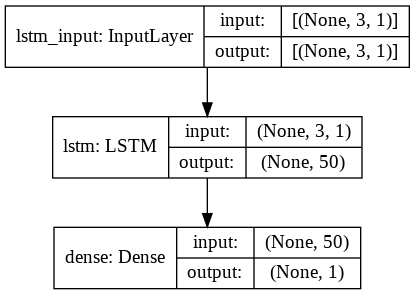

In [ ]:
# Plot model hierrarchy
from keras.utils import vis_utils
vis_utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

### Stacked LSTM

In [ ]:
# univariate stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
# split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


# See the dataset
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps,
n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

(6, 3, 1) (6,)
[[10]
 [20]
 [30]] 40
[[20]
 [30]
 [40]] 50
[[30]
 [40]
 [50]] 60
[[40]
 [50]
 [60]] 70
[[50]
 [60]
 [70]] 80
[[60]
 [70]
 [80]] 90
[[103.05455]]


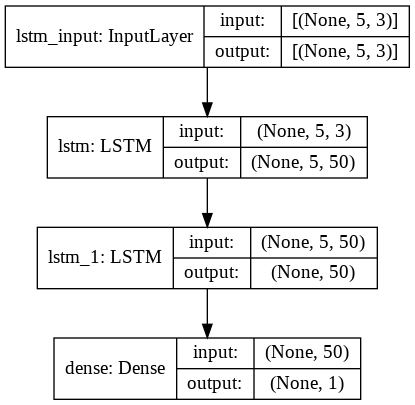

In [ ]:
# Plot model hierrarchy
from keras.utils import vis_utils
vis_utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

### Bidirectional LSTM

### CNN-LSTM


In [ ]:
# univariate cnn lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

# See the dataset
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'),
input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction
x_input = array([60, 70, 80, 90])

x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

(5, 2, 2, 1) (5,)
[[[10]
  [20]]

 [[30]
  [40]]] 50
[[[20]
  [30]]

 [[40]
  [50]]] 60
[[[30]
  [40]]

 [[50]
  [60]]] 70
[[[40]
  [50]]

 [[60]
  [70]]] 80
[[[50]
  [60]]

 [[70]
  [80]]] 90
[[100.54567]]


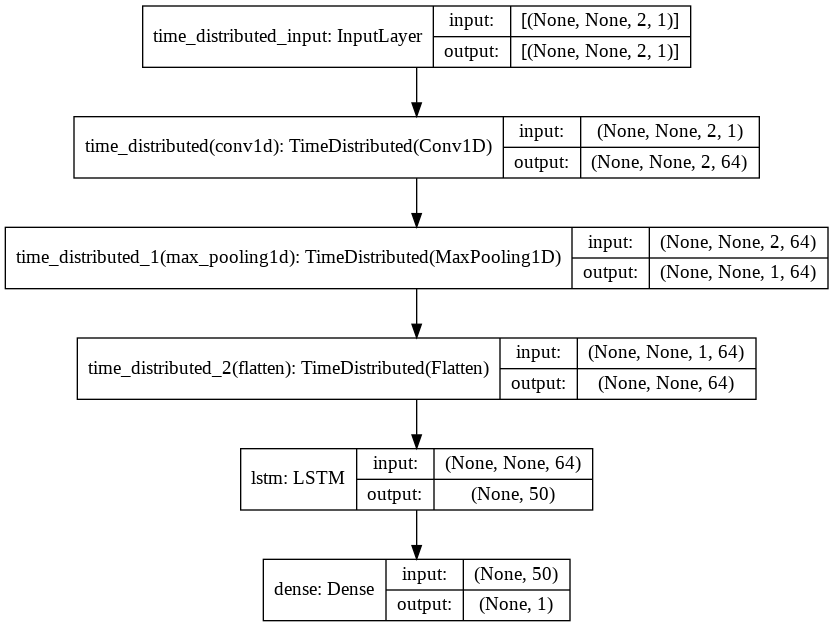

In [ ]:
# Plot model hierrarchy
from keras.utils import vis_utils
vis_utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

### ConvLSTM
A type of LSTM related to the CNN-LSTM is the ConvLSTM, where the convolutional reading
of input is built directly into each LSTM unit. The ConvLSTM was developed for reading
two-dimensional spatial-temporal data, but can be adapted for use with univariate time series
forecasting. The layer expects input as a sequence of two-dimensional images, therefore the
shape of input data must be: [samples, timesteps, rows, columns, features].
For our purposes, we can split each sample into subsequences where timesteps will become
the number of subsequences, or n seq , and columns will be the number of time steps for
each subsequence, or n steps . The number of rows is fixed at 1 as we are working with
one-dimensional data. We can now reshape the prepared samples into the required structure

In [ ]:
# univariate convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [ ]:
# See the dataset
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

# reshaping for the convlstm
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

# See the dataset
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

(5, 4) (5,)
[10 20 30 40] 50
[20 30 40 50] 60
[30 40 50 60] 70
[40 50 60 70] 80
[50 60 70 80] 90
(5, 2, 1, 2, 1) (5,)
[[[[10]
   [20]]]


 [[[30]
   [40]]]] 50
[[[[20]
   [30]]]


 [[[40]
   [50]]]] 60
[[[[30]
   [40]]]


 [[[50]
   [60]]]] 70
[[[[40]
   [50]]]


 [[[60]
   [70]]]] 80
[[[[50]
   [60]]]


 [[[70]
   [80]]]] 90


## Multivariate LSTM Models

Multivariate time series data means data where there is more than one observation for each
time step. There are two main models that we may require with multivariate time series data;
they are:
1. Multiple Input Series.
2. Multiple Parallel Series.
Let’s take a look at each in turn.

### Multi-step LSTM Models
A time series forecasting problem that requires a prediction of multiple time steps into the
future can be referred to as multi-step time series forecasting. Specifically, these are problems
where the forecast horizon or interval is more than one time step. There are two main types of
LSTM models that can be used for multi-step forecasting; they are:
9.4. Multi-step LSTM Models 145
1. Vector Output Model
2. Encoder-Decoder Model

__Data Preparation__

In [ ]:
# multi-step data preparation
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)


# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] [40 50]
[20 30 40] [50 60]
[30 40 50] [60 70]
[40 50 60] [70 80]
[50 60 70] [80 90]


### Encoder-Decoder Model
A model specifically developed for forecasting variable length output sequences is called the
Encoder-Decoder LSTM. The model was designed for prediction problems where there are
both input and output sequences, so-called __sequence-to-sequence, or seq2seq__ problems, such
as translating text from one language to another. This model can be used for multi-step time
series forecasting. As its name suggests, the model is comprised of two sub-models: the encoder
and the decoder.

__Univariate Encoder-Decoder LSTM__

In [ ]:
# univariate multi-step encoder-decoder lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# define model
n_features = 1
n_steps_in, n_steps_out = 3, 2

# Encoder part
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))

# Decoder part
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

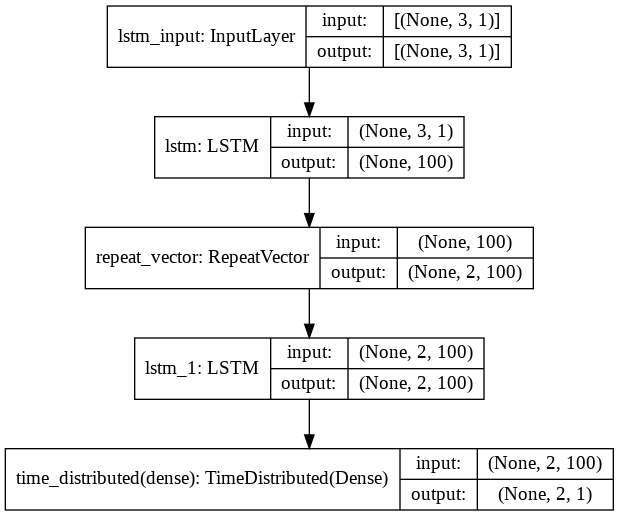

In [ ]:
# Plot model hierrarchy
from keras.utils import vis_utils
vis_utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

### Multivariate Multi-step LSTM Models
In the previous sections, we have looked at univariate, multivariate, and multi-step time series
forecasting. It is possible to mix and match the different types of LSTM models presented so
far for the different problems. This too applies to time series forecasting problems that involve
multivariate and multi-step forecasting, but it may be a little more challenging. In this section,
we will provide short examples of data preparation and modeling for multivariate multi-step
time series forecasting as a template to ease this challenge, specifically:
1. Multiple Input Multi-step Output.
2. Multiple Parallel Input and Multi-step Output.
<br/> <br/>     Perhaps the biggest stumbling block is in the preparation of data, so this is where we will
focus our attention.

In [ ]:
# multivariate multi-step stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]


# summarize the data
for i in range(len(X)):
    print(X[i], y[i])
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in,
n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([[70, 75], [80, 85], [90, 95]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[10 15]
 [20 25]
 [30 35]] [65 85]
[[20 25]
 [30 35]
 [40 45]] [ 85 105]
[[30 35]
 [40 45]
 [50 55]] [105 125]
[[40 45]
 [50 55]
 [60 65]] [125 145]
[[50 55]
 [60 65]
 [70 75]] [145 165]
[[60 65]
 [70 75]
 [80 85]] [165 185]
[[187.29805 207.64651]]


### Multiple Parallel Input and Multi-step Output

- We can use either the Vector Output or Encoder-Decoder LSTM to model this problem. In
this case, we will use the Encoder-Decoder model

In [ ]:
# multivariate multi-step encoder-decoder lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]


# Final Datset Check
for i in range(len(X)):
    print(X[i], y[i])

# define model
# Encoder part
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))

# Decoder part
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=0)
# demonstrate prediction
x_input = array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[10 15 25]
 [20 25 45]
 [30 35 65]] [[ 40  45  85]
 [ 50  55 105]]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [[ 50  55 105]
 [ 60  65 125]]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [[ 60  65 125]
 [ 70  75 145]]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [[ 70  75 145]
 [ 80  85 165]]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [[ 80  85 165]
 [ 90  95 185]]
[[[ 90.67933  95.56285 186.14148]
  [ 99.14369 105.35988 205.45535]]]


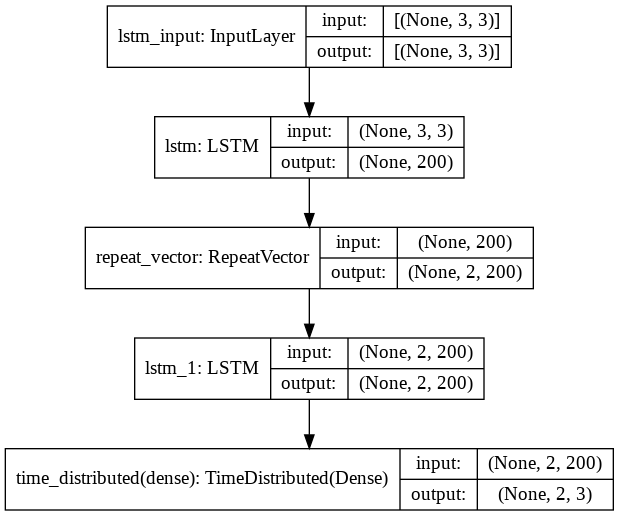

In [ ]:
# Plot model hierrarchy
from keras.utils import vis_utils
vis_utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

# Top Methods For Univariate Time Series Forecasting

Machine learning and deep learning methods are often reported to be the key solution to
all predictive modeling problems. An important recent study evaluated and compared the
performance of many classical and modern machine learning and deep learning methods on a
large and diverse set of more than 1,000 univariate time series forecasting problems. The results
of this study suggest that simple classical methods, such as linear methods and exponential
smoothing, outperform complex and sophisticated methods, such as decision trees, Multilayer
Perceptrons (MLP), and Long Short-Term Memory (LSTM) network models. These findings
highlight the requirement to both evaluate classical methods and use their results as a baseline
when evaluating any machine learning and deep learning methods for time series forecasting in
order to demonstrate that their added complexity is adding skill to the forecast.

In this tutorial, you will discover the important findings of this recent study evaluating and
comparing the performance of a classical and modern machine learning methods on a large and
diverse set of time series forecasting datasets. After reading this tutorial, you will know:


<br/>

- Classical methods like ETS and ARIMA out-perform machine learning and deep learning
methods for one-step forecasting on univariate datasets.
- Classical methods like Theta and ARIMA out-perform machine learning and deep learning
methods for multi-step forecasting on univariate datasets.
- Machine learning and deep learning methods do not yet deliver on their promise for
univariate time series forecasting, and there is much work to do.

## Spyros Makridakis, et al. 2018
Statistical and Machine Learning forecasting methods: Concerns and ways forward.

__Literally hundreds of papers propose new ML algorithms, suggesting methodological
advances and accuracy improvements. Yet, limited objective evidence is available
regarding their relative performance as a standard forecasting tool.__

- Statistical and Machine Learning forecasting methods: Concerns and ways forward, 2018.


The authors clearly lay out three issues with the flood of claims; they are:
- Their conclusions are based on a few, or even a single time series, raising questions about the statistical significance of the results and their generalization.
- The methods are evaluated for short-term forecasting horizons, often one-step-ahead, not considering medium and long-term ones.
- No benchmarks are used to compare the accuracy of ML methods versus alternative ones.

As a response, the study includes eight classical methods and 10 machine learning methods
evaluated using one-step and multiple-step forecasts across a collection of 1,045 monthly time
series. Although not definitive, the results are intended to be objective and robust

### Time Series Forecasting Methods

##  Grid Search Framework

In [ ]:
# example of a one-step naive forecast
def naive_forecast(history, n):
    return history[-n]
# define dataset
data = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
print(data)
# test naive forecast
for i in range(1, len(data)+1):
    print(naive_forecast(data, i))

[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
100.0
90.0
80.0
70.0
60.0
50.0
40.0
30.0
20.0
10.0


In [ ]:
# example of an average forecast
from numpy import mean
from numpy import median
# one-step average forecast
def average_forecast(history, config):
    n, avg_type = config
    # mean of last n values
    if avg_type is 'mean':
        return mean(history[-n:])
    # median of last n values
    return median(history[-n:])
# define dataset
data = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
print(data)
# test naive forecast
for i in range(1, len(data)+1):
    print(average_forecast(data, (i, 'mean')))

[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
100.0
95.0
90.0
85.0
80.0
75.0
70.0
65.0
60.0
55.0


In [ ]:
mean([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0])

55.0

In [ ]:
# example of an average forecast for seasonal data
from numpy import mean
from numpy import median
# one-step average forecast
def average_forecast(history, config):
    n, offset, avg_type = config
    values = list()
    if offset == 1:
        values = history[-n:]
    else:
    # skip bad configs
        if n*offset > len(history):
            raise Exception('Config beyond end of data: %d %d' % (n,offset))
        # try and collect n values using offset
        for i in range(1, n+1):
            ix = i * offset
            values.append(history[-ix])
            print('\tix: ',history[-ix])
        # mean of last n values
    if avg_type is 'mean':
        return mean(values)
    # median of last n values
    return median(values)
# define dataset
data = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
print(data)
# test naive forecast
for i in [1, 2, 3]:
    print(average_forecast(data, (i, 2, 'mean')))

[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
	ix:  90.0
90.0
	ix:  90.0
	ix:  70.0
80.0
	ix:  90.0
	ix:  70.0
	ix:  50.0
70.0


### Time Series - Walk Forward Validation

In time series modelling, the predictions over time become less and less accurate and hence it is a more realistic approach to re-train the model with actual data as it gets available for further predictions. Since training of statistical models are not time consuming, walk-forward validation is the most preferred solution to get most accurate results ([source](https://www.tutorialspoint.com/time_series/time_series_walk_forward_validation.htm))

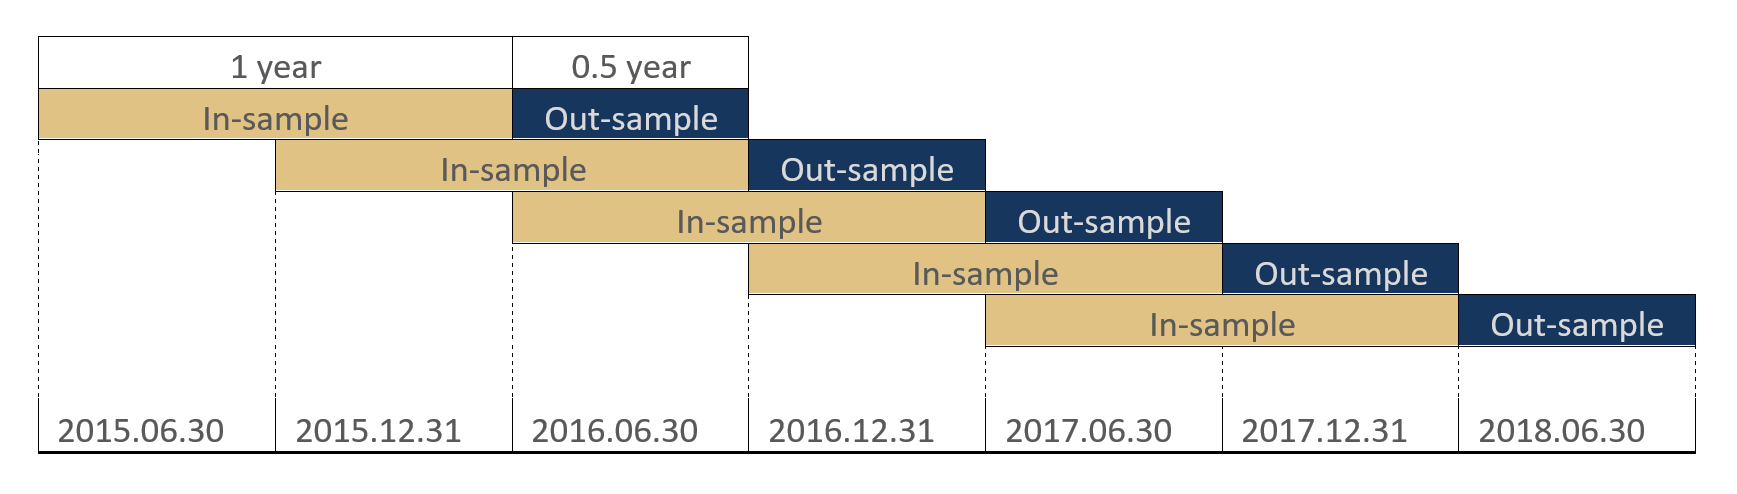

In [ ]:
x = [1,2]
for i in 'abcdef':
    x.append(i)

In [ ]:
x

[1, 2, 'a', 'b', 'c', 'd', 'e', 'f']

### Parallel Computing

In [ ]:
# grid search simple forecasts
from math import sqrt
from numpy import mean
from numpy import median
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error

In [ ]:
# define executor
executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
tasks

NameError: ignored

In [ ]:
# create a set of simple configs to try
def simple_configs(max_length, offsets=[1]):
    configs = list()
    for i in range(1, max_length+1):
        print(i)
        for o in offsets:
            for t in ['persist', 'mean', 'median']:
                cfg = [i, o, t]
                configs.append(cfg)
    return configs

In [ ]:
a = simple_configs(5)
a

1
2
3
4
5


[[1, 1, 'persist'],
 [1, 1, 'mean'],
 [1, 1, 'median'],
 [2, 1, 'persist'],
 [2, 1, 'mean'],
 [2, 1, 'median'],
 [3, 1, 'persist'],
 [3, 1, 'mean'],
 [3, 1, 'median'],
 [4, 1, 'persist'],
 [4, 1, 'mean'],
 [4, 1, 'median'],
 [5, 1, 'persist'],
 [5, 1, 'mean'],
 [5, 1, 'median']]

In [ ]:
# grid search simple forecasts
from math import sqrt
from numpy import mean
from numpy import median
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error
# one-step simple forecast
def simple_forecast(history, config):
    n, offset, avg_type = config
    # persist value, ignore other config
    if avg_type == 'persist':
        return history[-n]
    # collect values to average
    values = list()
    if offset == 1:
        values = history[-n:]
    else:
    # skip bad configs
        if n*offset > len(history):
            raise Exception('Config beyond end of data: %d %d' % (n,offset))
    # try and collect n values using offset
    for i in range(1, n+1):
        ix = i * offset
        values.append(history[-ix])
    # check if we can average
    if len(values) < 2:
        raise Exception('Cannot calculate average')
    # mean of last n values
    if avg_type == 'mean':
        return mean(values)
    # median of last n values
    return median(values)


# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = simple_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # estimate prediction error
    error = measure_rmse(test, predictions)
    return error
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
    # one failure during model validation suggests an unstable config
        try:
        # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        #print(' > Model[%s] %.3f' % (key, result))
        print(f' : Model[{key}] {result}')
    return (key, result)


# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
   
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores


# create a set of simple configs to try
def simple_configs(max_length, offsets=[1]):
    configs = list()
    for i in range(1, max_length+1):
        for o in offsets:
            for t in ['persist', 'mean', 'median']:
                cfg = [i, o, t]
                configs.append(cfg)
    return configs
if __name__ == '__main__':
# define dataset
    data = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
    # data split
    n_test = 4
    # model configs
    max_length = len(data) - n_test
    cfg_list = simple_configs(max_length)
    # grid search
    scores = grid_search(data, cfg_list, n_test)
    print('done')
    # list top 3 configs
    for cfg, error in scores[:3]:
        print(cfg, error)

 : Model[[1, 1, 'mean']] 10.0
 : Model[[1, 1, 'persist']] 10.0
 : Model[[1, 1, 'median']] 10.0
 : Model[[2, 1, 'persist']] 20.0
 : Model[[2, 1, 'mean']] 15.0
 : Model[[3, 1, 'persist']] 30.0
 : Model[[2, 1, 'median']] 15.0
 : Model[[3, 1, 'mean']] 20.0
 : Model[[4, 1, 'mean']] 25.0
 : Model[[3, 1, 'median']] 20.0
 : Model[[4, 1, 'median']] 25.0
 : Model[[5, 1, 'persist']] 50.0
 : Model[[4, 1, 'persist']] 40.0
 : Model[[5, 1, 'mean']] 30.0
 : Model[[5, 1, 'median']] 30.0
 : Model[[6, 1, 'mean']] 35.0
 : Model[[6, 1, 'persist']] 60.0
 : Model[[6, 1, 'median']] 35.0
done
[1, 1, 'persist'] 10.0
[1, 1, 'mean'] 10.0
[1, 1, 'median'] 10.0


### Simple grid-search realdata

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving daily-total-female-births.csv to daily-total-female-births.csv


In [ ]:
import pandas as pd
series = pd.read_csv('daily-total-female-births.csv', header =0, index_col=0)


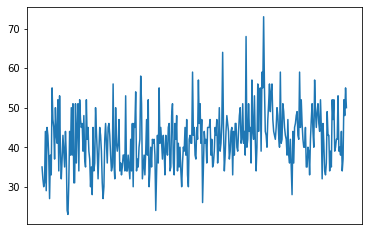

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.plot(series)
pyplot.xticks([])
pyplot.show()

In [ ]:
# grid search simple forecast for daily female births
from math import sqrt
from numpy import mean
from numpy import median
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error
from pandas import read_csv

In [ ]:
# one-step simple forecast
def simple_forecast(history, config):
    n, offset, avg_type = config
    # persist value, ignore other config
    if avg_type == 'persist':
        return history[-n]
    # collect values to average
    values = list()
    if offset == 1:
        values = history[-n:]
    else:
    # skip bad configs
        if n*offset > len(history):
            raise Exception('Config beyond end of data: %d %d' % (n,offset))
    # try and collect n values using offset
        for i in range(1, n+1):
            ix = i * offset
            values.append(history[-ix])
        # check if we can average
    if len(values) < 2:
        raise Exception('Cannot calculate average')
    # mean of last n values
    if avg_type == 'mean':
        return mean(values)
    # median of last n values
    return median(values)

In [ ]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

In [ ]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
    # fit model and make forecast for history
        yhat = simple_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error

In [ ]:
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
    # one failure during model validation suggests an unstable config
        try:
    # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)

In [ ]:
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

In [ ]:
# create a set of simple configs to try
def simple_configs(max_length, offsets=[1]):
    configs = list()
    for i in range(1, max_length+1):
        for o in offsets:
            for t in ['persist', 'mean', 'median']:
                cfg = [i, o, t]
                configs.append(cfg)
    return configs

In [ ]:
if __name__ == '__main__':
# define dataset
    series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
    data = series.values
    # data split
    n_test = 165
    # model configs
    max_length = len(data) - n_test
    cfg_list = simple_configs(max_length)
    # grid search
    scores = grid_search(data, cfg_list, n_test)
    print('done')
    # list top 3 configs
    for cfg, error in scores[:3]:
        print(cfg, error)

 > Model[[2, 1, 'persist']] 9.284
 > Model[[1, 1, 'persist']] 8.722
 > Model[[3, 1, 'persist']] 9.320
 > Model[[2, 1, 'mean']] 7.884
 > Model[[3, 1, 'mean']] 7.518
 > Model[[2, 1, 'median']] 7.884
 > Model[[3, 1, 'median']] 7.324
 > Model[[4, 1, 'persist']] 9.249
 > Model[[5, 1, 'persist']] 9.415
 > Model[[4, 1, 'mean']] 7.290
 > Model[[5, 1, 'mean']] 7.204
 > Model[[5, 1, 'median']] 7.337
 > Model[[4, 1, 'median']] 7.217
 > Model[[6, 1, 'persist']] 9.737
 > Model[[6, 1, 'mean']] 7.222
 > Model[[7, 1, 'median']] 7.340
 > Model[[8, 1, 'persist']] 10.172
 > Model[[8, 1, 'mean']] 7.140
 > Model[[6, 1, 'median']] 7.230
 > Model[[7, 1, 'persist']] 8.791
 > Model[[8, 1, 'median']] 7.331
 > Model[[7, 1, 'mean']] 7.042
 > Model[[9, 1, 'persist']] 10.175
 > Model[[10, 1, 'mean']] 7.209
 > Model[[9, 1, 'mean']] 7.200
 > Model[[10, 1, 'median']] 7.349
 > Model[[9, 1, 'median']] 7.302
 > Model[[10, 1, 'persist']] 9.956
 > Model[[13, 1, 'persist']] 10.020
 > Model[[13, 1, 'mean']] 7.238
 > Model[[1

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hell.py to hell.py


### Create a list of configs

In [ ]:
def exp_smoothing_configs(seasonal=[None]):
    models = list()
    # define config lists
    t_params = ['add', 'mul', None]
    d_params = [True, False]
    s_params = ['add', 'mul', None]
    p_params = seasonal
    b_params = [True, False]
    r_params = [True, False]
    # create config instances
    for t in t_params:
        for d in d_params:
            for s in s_params:
                for p in p_params:
                    for b in b_params:
                        for r in r_params:
                            cfg = [t,d,s,p,b,r]
                            models.append(cfg)
    return models

In [ ]:
cnf = exp_smoothing_configs()
cnf

[['add', True, 'add', None, True, True],
 ['add', True, 'add', None, True, False],
 ['add', True, 'add', None, False, True],
 ['add', True, 'add', None, False, False],
 ['add', True, 'mul', None, True, True],
 ['add', True, 'mul', None, True, False],
 ['add', True, 'mul', None, False, True],
 ['add', True, 'mul', None, False, False],
 ['add', True, None, None, True, True],
 ['add', True, None, None, True, False],
 ['add', True, None, None, False, True],
 ['add', True, None, None, False, False],
 ['add', False, 'add', None, True, True],
 ['add', False, 'add', None, True, False],
 ['add', False, 'add', None, False, True],
 ['add', False, 'add', None, False, False],
 ['add', False, 'mul', None, True, True],
 ['add', False, 'mul', None, True, False],
 ['add', False, 'mul', None, False, True],
 ['add', False, 'mul', None, False, False],
 ['add', False, None, None, True, True],
 ['add', False, None, None, True, False],
 ['add', False, None, None, False, True],
 ['add', False, None, None, Fal

### Develop SARIMA Models for Univariate Forecasting

The Seasonal Autoregressive Integrated Moving Average, or SARIMA, model is an approach
for modeling univariate time series data that may contain trend and seasonal components. It
is an effective approach for time series forecasting, although it requires careful analysis and
domain expertise in order to configure the seven or more model hyperparameters. An alternative
approach to configuring the model that makes use of fast and parallel modern hardware is to
grid search a suite of hyperparameter configurations in order to discover what works best. Often,
this process can reveal non-intuitive model configurations that result in lower forecast error
than those configurations specified through careful analysis.
In this tutorial, you will discover how to develop a framework for grid searching all of the
SARIMA model hyperparameters for univariate time series forecasting. After completing this
tutorial, you will know:

* How to develop a framework for grid searching SARIMA models from scratch using
walk-forward validation.
* How to grid search SARIMA model hyperparameters for daily time series data for births.
* How to grid search SARIMA model hyperparameters for monthly time series data for
shampoo sales, car sales, and temperature.

### Grid-search with SARIMAX

In [ ]:
# grid search sarima hyperparameters
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend,
    enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

## Develop MLPs, CNNs and LSTMs for Univariate Forecasting

THis has five subsections:
1. Time Series Problem
2. Model Evaluation Test Harness
3. Multilayer Perceptron Model
4. Convolutional Neural Network Model
5. Recurrent Neural Network Models
2

### Walk-Forward Validation
Time series forecasting models can be evaluated on a test set using walk-forward validation.
Walk-forward validation is an approach where the model makes a forecast for each observation
in the test dataset one at a time. After each forecast is made for a time step in the test
dataset, the true observation for the forecast is added to the test dataset and made available to
the model. Simpler models can be refit with the observation prior to making the subsequent
prediction. More complex models, such as neural networks, are not refit given the much greater
computational cost. Nevertheless, the true observation for the time step can then be used as
part of the input for making the prediction on the next time step. First, the dataset is split into
train and test sets. We will call the train test split() function to perform this split and
pass in the pre-specified number of observations to use as the test data.
A model will be fit once on the training dataset for a given configuration. We will define a
generic model fit() function to perform this operation that can be filled in for the given type
of neural network that we may be interested in later. The function takes the training dataset
and the model configuration and returns the fit model ready for making predictions.

```python

# fit a model
def model_fit(train, config):
    return None
# forecast with a pre-fit model
def model_predict(model, history, config):
    return 0.0
```


### Repeat Evaluation
Neural network models are stochastic. This means that, given the same model configuration
and the same training dataset, a different internal set of weights will result each time the model
is trained that will in turn have a different performance. This is a benefit, allowing the model to
be adaptive and find high performing configurations to complex problems. It is also a problem
when evaluating the performance of a model and in choosing a final model to use to make
predictions.
To address model evaluation, we will evaluate a model configuration multiple times via
walk-forward validation and report the error as the average error across each evaluation. This is
not always possible for large neural networks and may only make sense for small networks that
can be fit in minutes or hours. The repeat evaluate() function below implements this and
allows the number of repeats to be specified as an optional parameter that defaults to 30 and
returns a list of model performance scores: in this case, RMSE values.

~~~python
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    return scores


~~~

### MLP & walk-forward validation

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving monthly-car-sales.csv to monthly-car-sales.csv


>  1490.268
>  1478.336
>  1680.009
>  1546.025
>  1332.034
>  1303.504
>  1292.748
>  1852.313
>  1552.678
>  1645.813
>  1594.099
>  1583.064
>  1687.426
>  1348.019
>  1679.886
>  1549.05
>  1806.469
>  1808.866
>  1725.348
>  1620.858
>  1420.907
>  1509.678
>  1720.116
>  1374.74
>  1700.957
>  1609.269
>  1780.955
>  1511.9
>  1713.361
>  1474.842
mlp: 1579.785 RMSE (+/- 154.225)


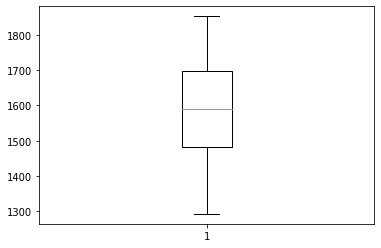

In [ ]:


# evaluate mlp for monthly car sales dataset
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# transform list into supervised learning format
def series_to_supervised(data, n_in, n_out=1):
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    agg.dropna(inplace=True)
    return agg.values

# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# fit a model
def model_fit(train, config):
    # unpack config
    n_input, n_nodes, n_epochs, n_batch = config
    # prepare data
    data = series_to_supervised(train, n_input)
    train_x, train_y = data[:, :-1], data[:, -1]
    # define model
    model = Sequential()
    model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    # fit
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    return model

# forecast with a pre-fit model
def model_predict(model, history, config):
    # unpack config
    n_input, _, _, _ = config
    # prepare data
    x_input = array(history[-n_input:]).reshape(1, n_input)
    # forecast
    yhat = model.predict(x_input, verbose=0)
    return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    # print(' > %.3f' % error)
    print(f'>  {round(error, 3)}')
    return error

# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    return scores

# summarize model performance
def summarize_scores(name, scores):
    # print a summary
    scores_m, score_std = mean(scores), std(scores)
    print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
    # box and whisker plot
    pyplot.boxplot(scores)
    pyplot.show()

series = read_csv('monthly-car-sales.csv', header=0, index_col=0)
data = series.values
# data split
n_test = 12
# define config
config = [24, 500, 100, 100]
# grid search
scores = repeat_evaluate(data, config, n_test)
# summarize scores
summarize_scores('mlp', scores)

In [ ]:
scores

## Grid Search Deep Learning Models for Univariate Forecasting